In [1]:
%reload_ext autoreload
%autoreload 2

from common_imports import *

In [2]:
system = Ps_system(N_points = 200)
rabi0 = 2*np.pi*(350e-3)
chirp = 2*np.pi*(150e-3)
detuning = 0
direction = 1
pulse_duration = 10
system.flag_photoionisation = True

laser_guess = { "label":"laser",
                "scale":1000,
                "order":0,
                "rabi0" :rabi0,
                "detuning0": detuning,
                "chirp" : chirp,
                "pulse_duration" : pulse_duration,
                "unit_wavevector":direction,
                "start":0,
                "end":int(3*pulse_duration)
                }
laser = laser_new(laser_guess)
system.init_distribution_flattop()
system.create_composite(laser)
system.init_states_excited()
initial_state = system.states.unit()


system.set_Hamiltonian_MT_general_laser(laser)
#system.set_Hamiltonian_noCMT(args)
#result = qt.mesolve(system.H,tlist=laser.tlist,rho0 = initial_state,e_ops = system.e_ops,c_ops=[],progress_bar=True)
result = qt.mesolve(system.H,tlist=laser.tlist,rho0 = initial_state,e_ops = system.e_ops,c_ops=[system.c_ops],progress_bar=True)

10.8%. Run time:  33.44s. Est. time left: 00:00:04:35
21.6%. Run time:  64.66s. Est. time left: 00:00:03:54
32.4%. Run time:  97.15s. Est. time left: 00:00:03:22
40.5%. Run time: 121.48s. Est. time left: 00:00:02:58
51.4%. Run time: 153.24s. Est. time left: 00:00:02:25
62.2%. Run time: 186.12s. Est. time left: 00:00:01:53
70.3%. Run time: 210.38s. Est. time left: 00:00:01:29
81.1%. Run time: 242.75s. Est. time left: 00:00:00:56
91.9%. Run time: 273.53s. Est. time left: 00:00:00:24
Total run time: 290.68s


In [ ]:






final_states = np.asarray(result.expect)[:,-1]
plt.plot(system.velocity_bins,np.asarray(result.expect)[system.N_points*2:system.N_points*3,0],ls="dashed",color="black")
plt.plot(system.velocity_bins[1:-1],final_states[1+system.N_points:system.N_points*2-1],label=r"$P_g$")
plt.plot(system.velocity_bins[2:-1],final_states[2+system.N_points*2:system.N_points*3-1],label=r"$P_e$")
plt.plot(system.velocity_bins,final_states[0:system.N_points],label=r"$ph.$")
#plt.plot(system.velocity_bins[2:],final_states[2:system.N_points]*100*system.N_points,label=r"$ph.$")
plt.ylabel("population",fontsize=15)
plt.xlabel("velocity [cm/ps]")
#plt.grid()
plt.legend(fontsize=15)
#plt.savefig("figures/thesis_draft/photoionisation_flattop_extended.svg",bbox_inches="tight")



In [33]:
kets = [qt.basis(2,i) for i in range(2)]
e_ops = [qt.ket2dm(ket) for ket in kets]

pulse_duration = 10
binwidth = 2*np.pi/omega0*100
endTime = 3*pulse_duration
N_time = int(endTime/binwidth)
tlist = np.linspace(0,endTime,N_time)
tcentre = endTime/2
tlist_centre = np.full(tlist.size,tcentre)



chirp = 2*np.pi*(150e-3)
velocities = np.asarray([1e-4])#system.velocity_bins
rabi0 = 2*np.pi*(350e-3)
data = []
expect_g = []
expect_e = []
for i in range(velocities.size):
        v = velocities[i]
        envelope = rabi0*np.exp(-4*np.log(2)*(tlist-tlist_centre)**2/pulse_duration**2)
        detuning = omega0-omega0*(1+v/c)-(1+v/c)*chirp*(tlist-tlist_centre)
        H = []
        H.append([qt.Qobj([[0,0],[0,1]]),detuning])
        H.append([-hbar*qt.sigmax(),envelope])

        result_TLS = qt.sesolve(tlist = tlist, psi0 = kets[1], H=H,e_ops=e_ops)
        expect_g.append(result_TLS.expect[0])
        expect_e.append(result_TLS.expect[1])
        


In [34]:
print(np.trapz(expect_e,x=tlist))

[29.9445388]


In [30]:
time_spent_excited = []
for expect in expect_g:
    time_spent_excited.append(np.trapz(expect,x=tlist))



final_states = np.asarray(result.expect)[:,-1]

fig,ax=plt.subplots()
ax.plot(system.velocity_bins,final_states[0:system.N_points]*401*100,label=r"$ph.$")
ax2= ax.twinx()
ax2.plot(system.velocity_bins,time_spent_excited,color="orange")
plt.legend(fontsize=15)
#plt.savefig("figures/thesis_draft/photoionisation_flattop_extended.svg",bbox_inches="tight")



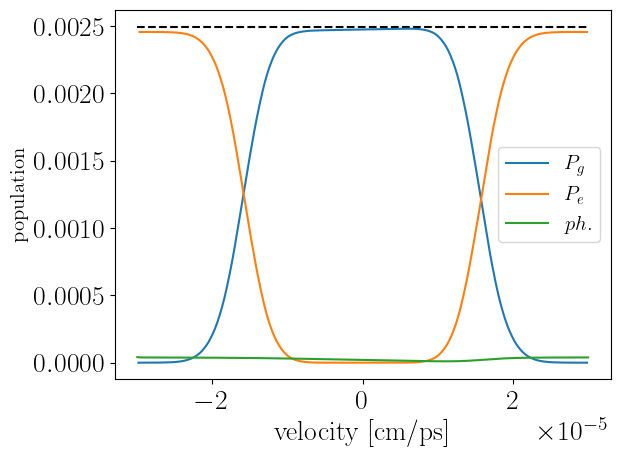

In [26]:
plt.plot(laser.tlist,np.asarray(result.expect)[2+system.N_points*2][:])
plt.plot(laser.tlist,np.asarray(result.expect)[2+system.N_points][:])
plt.legend(fontsize=15)
plt.xlabel("time")
plt.ylabel("population")
plt.show()